In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### 데이터 불러오기 

In [2]:
# 제일 왼쪽 열 index 설정. index_col 파라미터 사용
tel = pd.read_csv('./telecom_users.csv', index_col=0)
tel.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


### 데이터 구성 파악하기

In [3]:
# tel 데이터셋 크기 
tel.shape

(5986, 21)

In [4]:
tel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5986 entries, 1869 to 860
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object

In [5]:
tel.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5986.000000,5986.000000,5986.000000
mean,0.161377,32.468760,64.802213
std,0.367909,24.516391,30.114702
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.650000
50%,0.000000,29.000000,70.400000
75%,0.000000,56.000000,89.900000
max,1.000000,72.000000,118.750000


In [6]:
# https://www.kaggle.com/guptakush/telecommunication-data-analysis 참고
# value_count(), unique(), isnull(), sum(), nunique()


### 데이터 전처리하기

* SeniorCitizen 칼럼값들 int -> str 형변환

In [7]:
df = tel
df = df.astype({'SeniorCitizen': str})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5986 entries, 1869 to 860
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   object 
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object

In [8]:
# 자료형이 object인 칼럼들만 추출 
cols = list(df.columns)

ObjCols = []
for i in cols:
    if df[i].dtype == object:
        ObjCols.append(i)
        
ObjCols

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [9]:
# 자료형이 object인 칼럼들의 unique value 파악하기
for i in ObjCols:
    print(i)
    print(df[i].unique())
    print()

customerID
['7010-BRBUU' '9688-YGXVR' '9286-DOJGF' ... '8044-BGWPI' '7450-NWRTR'
 '4795-UXVCJ']

gender
['Male' 'Female']

SeniorCitizen
['0' '1']

Partner
['Yes' 'No']

Dependents
['Yes' 'No']

PhoneService
['Yes' 'No']

MultipleLines
['Yes' 'No' 'No phone service']

InternetService
['No' 'Fiber optic' 'DSL']

OnlineSecurity
['No internet service' 'No' 'Yes']

OnlineBackup
['No internet service' 'Yes' 'No']

DeviceProtection
['No internet service' 'Yes' 'No']

TechSupport
['No internet service' 'No' 'Yes']

StreamingTV
['No internet service' 'Yes' 'No']

StreamingMovies
['No internet service' 'No' 'Yes']

Contract
['Two year' 'Month-to-month' 'One year']

PaperlessBilling
['No' 'Yes']

PaymentMethod
['Credit card (automatic)' 'Bank transfer (automatic)' 'Electronic check'
 'Mailed check']

TotalCharges
['1734.65' '3973.2' '2869.85' ... '306.05' '1200.15' '457.3']

Churn
['No' 'Yes']



* Contract 칼럼 데이터 간소하게 아래와 같이 변경
```
'Two year' -> TY
'Month-to-month' -> MM
'One year' -> OY
```

In [10]:
df['Contract'] = df['Contract'].replace('Two year', 'TY')
df['Contract'] = df['Contract'].replace('Month-to-month', 'MM')
df['Contract'] = df['Contract'].replace('One year', 'OY')
df['Contract'].unique()

array(['TY', 'MM', 'OY'], dtype=object)

* PaymentMethod 칼럼 데이터 간소하게 아래와 같이 변경 
```
'Credit card (automatic)' -> CC
'Bank transfer (automatic)' -> BT
'Electronic check' -> EC
'Mailed check' -> MC
```

In [11]:
df['PaymentMethod'] = df['PaymentMethod'].replace('Credit card (automatic)', 'CC')
df['PaymentMethod'] = df['PaymentMethod'].replace('Bank transfer (automatic)', 'BT')
df['PaymentMethod'] = df['PaymentMethod'].replace('Electronic check', 'EC')
df['PaymentMethod'] = df['PaymentMethod'].replace('Mailed check', 'MC')
df['PaymentMethod'].unique()

array(['CC', 'BT', 'EC', 'MC'], dtype=object)

### distplot, histplot, barplot, pairplot 등으로 데이터 분포 확인

In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

성별 데이터 분석

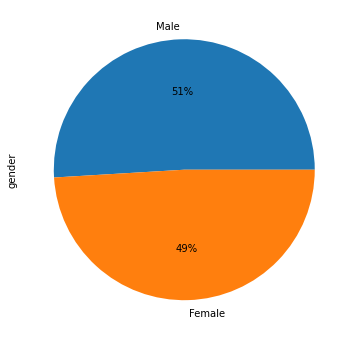

In [13]:
gender=df["gender"].value_counts()
plt.figure(figsize=(8,6))
plot=gender.plot.pie(autopct="%1.0f%%")
plt.show()
#남자 51%와 여자 49프로로 구성되어있다. 

결혼 여부 분석

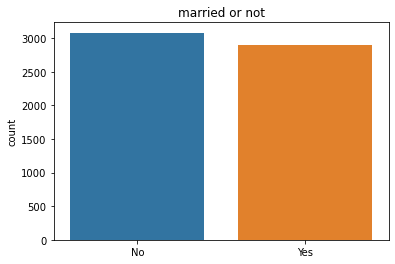

In [14]:
married=df['Partner'].value_counts()
plt.title('married or not')
plt.ylabel('count')
sns.barplot(x=married.index,y=married.values)
plt.show()

사용연수 분석

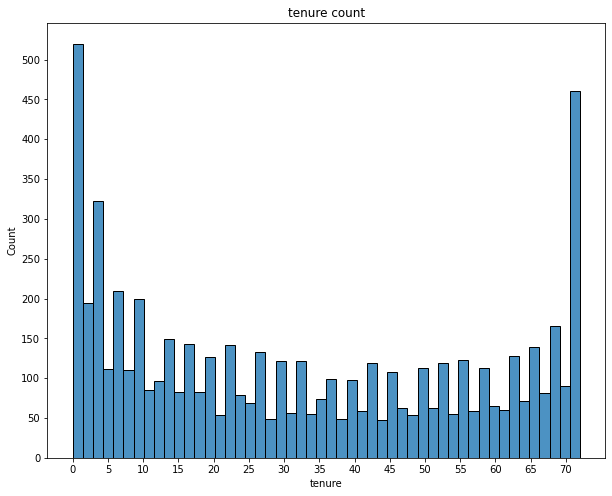

In [15]:
tenure = df['tenure']
plt.figure(figsize=(10,8))
sns.histplot(tenure, bins=50, alpha=0.8)
plt.xticks(list(range(0,tenure.max(),5)))
plt.yticks(list(range(0,550,50)))
plt.title('tenure count')
plt.show()

핸드폰 개통 손님 분석

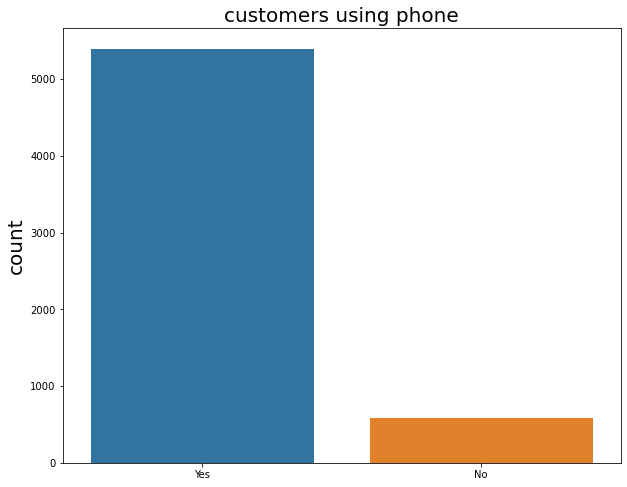

In [16]:
phone_services=df['PhoneService'].value_counts()
plt.figure(figsize=(10,8))
sns.barplot(x=phone_services.index,y=phone_services.values)
plt.ylabel('count',size=20)
plt.title('customers using phone',size=20)
plt.show()

고객 계약 데이터 분석
<br>
'Two year' -> TY
<br>
'Month-to-month' -> MM
<br>
'One year' -> OY

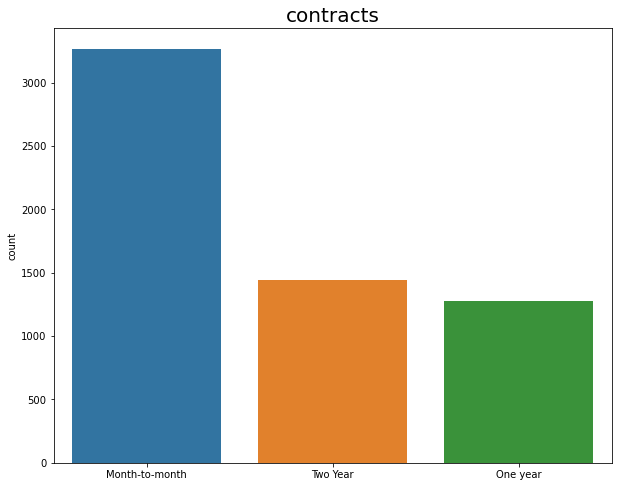

In [17]:
contract=df['Contract'].value_counts()
plt.figure(figsize=(10,8))
sns.barplot(y=contract.values,x=contract.index)
plt.title('contracts',size=20)
plt.xticks([0,1,2],['Month-to-month','Two Year','One year'])
plt.ylabel('count')
plt.show()

paperless billing을 사용하는 고객의 수 데이터 분석

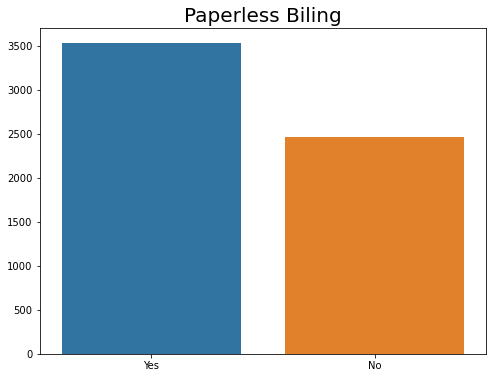

In [18]:
billing=df['PaperlessBilling'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=billing.index,y=billing.values)
plt.title('Paperless Biling',size=20)
plt.show()

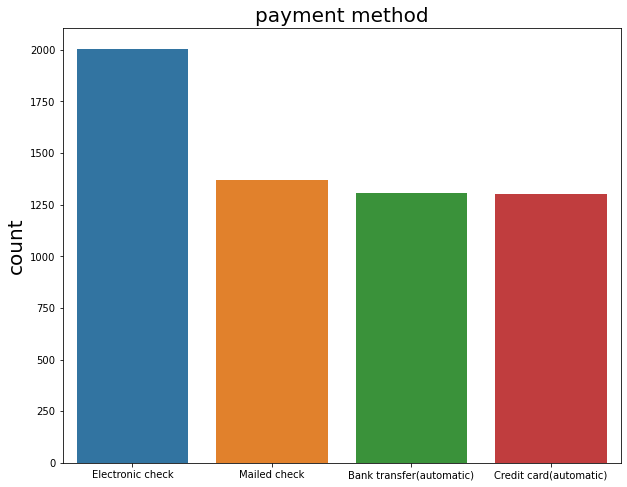

In [19]:
pmt=df['PaymentMethod'].value_counts()
plt.figure(figsize=(10,8))
sns.barplot(x=pmt.index,y=pmt.values)
plt.title('payment method',size=20)
plt.ylabel('count',size=20)
plt.xticks([0,1,2,3],['Electronic check','Mailed check',
                      'Bank transfer(automatic)','Credit card(automatic)'])
plt.show()

고객 사용금액 데이터 분석

/Users/seungsoolee/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


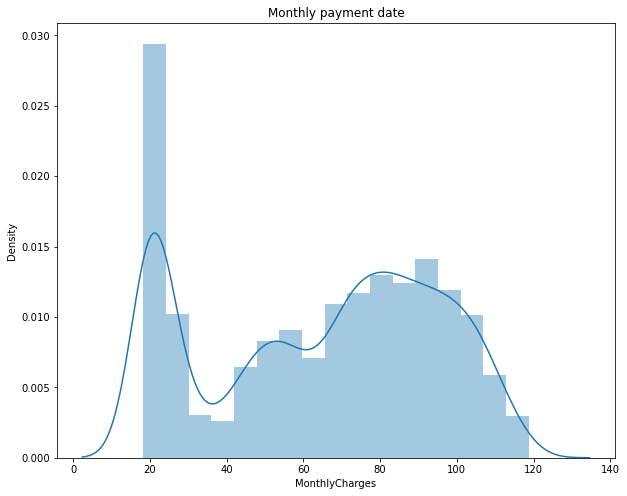

In [20]:
charges=df['MonthlyCharges']
plt.figure(figsize=(10,8))
sns.distplot(charges)
plt.title('Monthly payment date')
plt.show()

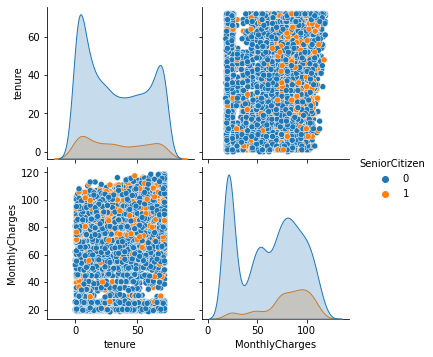

In [21]:
sns.pairplot(tel,hue = 'SeniorCitizen')

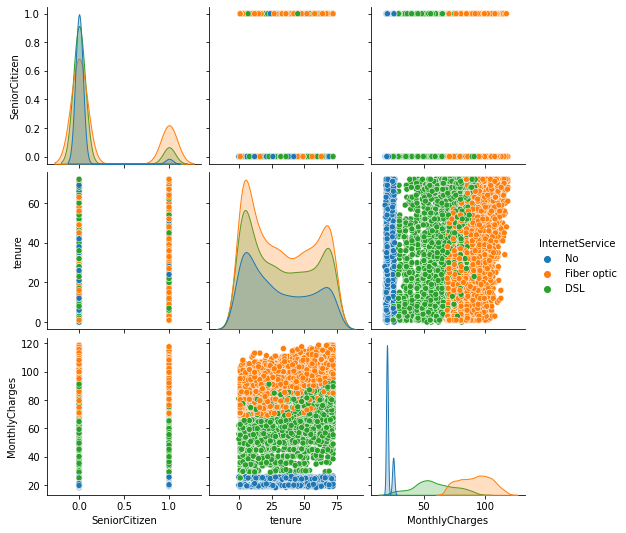

In [22]:
sns.pairplot(tel,hue = 'InternetService')

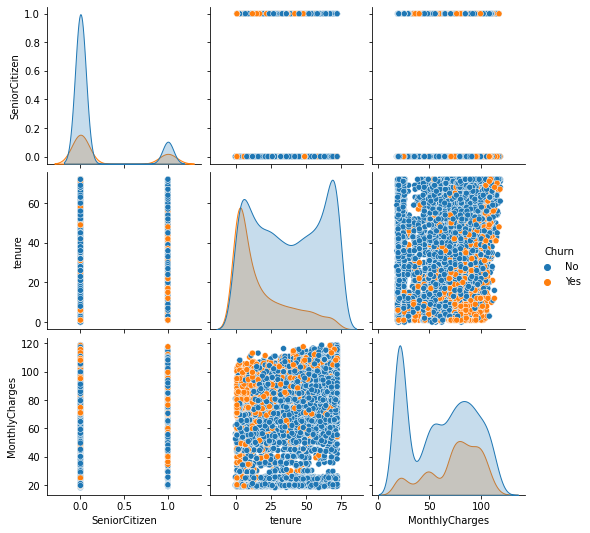

In [23]:
sns.pairplot(tel,hue = 'Churn')

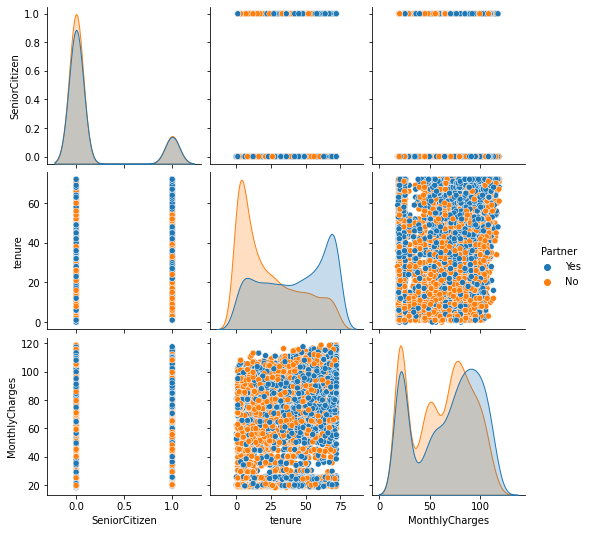

In [24]:
sns.pairplot(tel,hue = 'Partner')

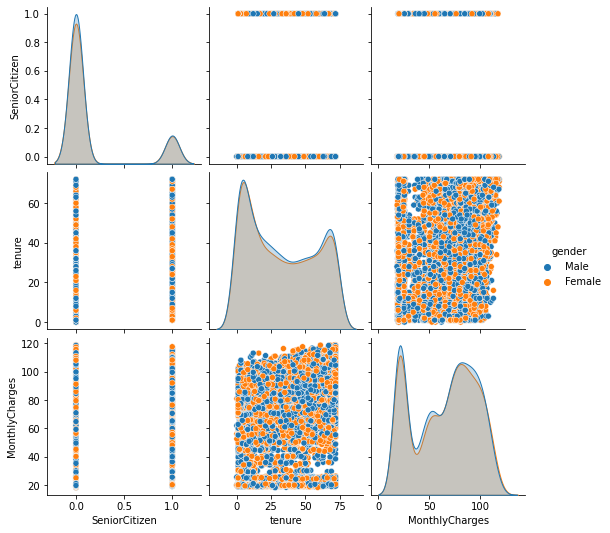

In [25]:
sns.pairplot(tel,hue = 'gender')

## 정의한 문제 해결하기

### 문제 1-4 해결하기
* df1~df4 사용

### 문제 5-8 해결하기
* df5~df8 사용

### 문제 9 해결하기
* df9 사용
* 머신러닝 모델 성능비교하기

### 결론